# Importação de bibliotecas

In [1]:
!pip install pandas --upgrade

import numpy as np
import pandas as pd
from IPython.display import display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.


## Importação do dataset (walmart-recruiting-store-sales-forecasting)

In [2]:
import pandas as pd

# Definir o caminho base para os datasets raw no GitHub
github_base_url = 'https://raw.githubusercontent.com/gustavolima007/demand-predictor-walmart-MLOps/main/data/walmart-recruiting-store-sales-forecasting/'

# Lista para armazenar os dataframes
dfs = {}

# Nomes dos arquivos CSV a serem importados
csv_files = [
    'features.csv',
    'sampleSubmission.csv',
    'stores.csv',
    'test.csv',
    'train.csv'
]

# Importar cada arquivo CSV do GitHub
for file_name in csv_files:
    file_url = github_base_url + file_name
    df_name = file_name.replace('.csv', '') # Nome do dataframe será o nome do arquivo sem a extensão
    try:
        dfs[df_name] = pd.read_csv(file_url)
        print(f"Arquivo {file_name} importado como dataframe '{df_name}' do GitHub.")
    except Exception as e:
        print(f"Erro ao importar o arquivo {file_name} do GitHub: {e}")

# Agora, acesse e exiba as 5 primeiras linhas de cada dataframe
print("\nExibindo as 5 primeiras linhas de cada dataframe:")

# Acesse o dataframe 'stores' e exiba as 5 primeiras linhas
df_stores = dfs.get('stores')
if df_stores is not None:
    print("\nExibindo dataframe 'df_stores':")
    display(df_stores.head())

# Acesse o dataframe 'train' e exiba as 5 primeiras linhas
df_train = dfs.get('train')
if df_train is not None:
    print("\nExibindo dataframe 'df_train':")
    display(df_train.head())

# Acesse o dataframe 'test' e exiba as 5 primeiras linhas
df_test = dfs.get('test')
if df_test is not None:
    print("\nExibindo dataframe 'df_test':")
    display(df_test.head())

# Acesse o dataframe 'sampleSubmission' e exiba as 5 primeiras linhas
df_sampleSubmission = dfs.get('sampleSubmission')
if df_sampleSubmission is not None:
    print("\nExibindo dataframe 'df_sampleSubmission':")
    display(df_sampleSubmission.head())

# Acesse o dataframe 'features' e exiba as 5 primeiras linhas
df_features = dfs.get('features')
if df_features is not None:
    print("\nExibindo dataframe 'df_features':")
    display(df_features.head())

Arquivo features.csv importado como dataframe 'features' do GitHub.
Arquivo sampleSubmission.csv importado como dataframe 'sampleSubmission' do GitHub.
Arquivo stores.csv importado como dataframe 'stores' do GitHub.
Arquivo test.csv importado como dataframe 'test' do GitHub.
Arquivo train.csv importado como dataframe 'train' do GitHub.

Exibindo as 5 primeiras linhas de cada dataframe:

Exibindo dataframe 'df_stores':


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Exibindo dataframe 'df_train':


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



Exibindo dataframe 'df_test':


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False



Exibindo dataframe 'df_sampleSubmission':


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0



Exibindo dataframe 'df_features':


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Unificação dos Dados (Merge)

In [3]:
# Unificação dos Dados (Merge)

# Para o conjunto de treino
df_train_merged = pd.merge(df_train, df_stores, on='Store', how='left')
df_train_merged = pd.merge(df_train_merged, df_features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Exibir as 5 primeiras linhas do dataframe merged
print("\nExibindo as 5 primeiras linhas do dataframe df_train_merged:")
display(df_train_merged.head())


Exibindo as 5 primeiras linhas do dataframe df_train_merged:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
# Para o conjunto de teste
df_test_merged = pd.merge(df_test, df_stores, on='Store', how='left')
df_test_merged = pd.merge(df_test_merged, df_features, on=['Store', 'Date', 'IsHoliday'], how='left')

print("\nExibindo as 5 primeiras linhas do dataframe df_test_merged:")
display(df_test_merged.head())


Exibindo as 5 primeiras linhas do dataframe df_test_merged:


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# Limpeza de Dados

Visualização dos dataframe

In [5]:
print("Informações sobre df_train_merged:")
df_train_merged.info()

print("\nInformações sobre df_test_merged:")
df_test_merged.info()

Informações sobre df_train_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage

In [6]:
# Converter 'Date' para datetime
df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'])
df_test_merged['Date'] = pd.to_datetime(df_test_merged['Date'])

df_train_merged.info()
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [7]:
print("--- Estatísticas Descritivas: df_train_merged ---")
display(df_train_merged.describe(include='all'))

print("\n--- Estatísticas Descritivas: df_test_merged ---")
display(df_test_merged.describe(include='all'))

--- Estatísticas Descritivas: df_train_merged ---


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,NaN,NaN,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000



--- Estatísticas Descritivas: df_test_merged ---


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064,115064,115064,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
unique,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,106136,58713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.238207,44.339524,2013-03-14 14:39:41.311270144,NaN,NaN,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
min,1.000000,1.000000,2012-11-02 00:00:00,NaN,NaN,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,2013-01-04 00:00:00,NaN,NaN,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,2013-03-15 00:00:00,NaN,NaN,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,2013-05-24 00:00:00,NaN,NaN,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,2013-07-26 00:00:00,NaN,NaN,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


## Tratamento de Weekly_Sales Negativas e Colunas MarkDown

In [8]:
num_vendas_negativas = (df_train_merged['Weekly_Sales'] < 0).sum()
print(f"Número de Weekly_Sales negativas: {num_vendas_negativas}")
if num_vendas_negativas > 0:
    print("Substituindo Weekly_Sales negativas por 0...")
    df_train_merged.loc[df_train_merged['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
    print(f"Verificação - Novo mínimo de Weekly_Sales: {df_train_merged['Weekly_Sales'].min()}")
else:
    print("Nenhuma Weekly_Sales negativa encontrada.")

Número de Weekly_Sales negativas: 1285
Substituindo Weekly_Sales negativas por 0...
Verificação - Novo mínimo de Weekly_Sales: 0.0


In [9]:
# 1. Tratamento de Weekly_Sales negativas em df_train_merged
print("--- Tratando Weekly_Sales negativas em df_train_merged ---")
num_vendas_negativas = (df_train_merged['Weekly_Sales'] < 0).sum()
if num_vendas_negativas > 0:
    print(f"Encontradas {num_vendas_negativas} Weekly_Sales negativas. Substituindo por 0...")
    df_train_merged.loc[df_train_merged['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
    print(f"Verificação - Novo mínimo de Weekly_Sales: {df_train_merged['Weekly_Sales'].min()}")
else:
    print("Nenhuma Weekly_Sales negativa encontrada em df_train_merged.")

# 2. Tratamento de MarkDowns negativos

markdown_cols_to_check = ['MarkDown2', 'MarkDown3']

# Tratamento para df_train_merged
print("\n--- Tratando MarkDowns negativos em df_train_merged ---")
for col in markdown_cols_to_check:
    if col in df_train_merged.columns:
        num_neg_markdown_train = (df_train_merged[col] < 0).sum()
        if num_neg_markdown_train > 0:
            print(f"Encontrados {num_neg_markdown_train} valores negativos em {col}. Substituindo por 0...")
            df_train_merged.loc[df_train_merged[col] < 0, col] = 0
            print(f"Verificação - Novo mínimo de {col}: {df_train_merged[col].min()}")
        else:
            print(f"Nenhum valor negativo encontrado em {col} no df_train_merged.")
    else:
        print(f"Coluna {col} não encontrada em df_train_merged.")

# Tratamento para df_test_merged
print("\n--- Tratando MarkDowns negativos em df_test_merged ---")
for col in markdown_cols_to_check:
    if col in df_test_merged.columns:
        num_neg_markdown_test = (df_test_merged[col] < 0).sum()
        if num_neg_markdown_test > 0:
            print(f"Encontrados {num_neg_markdown_test} valores negativos em {col}. Substituindo por 0...")
            df_test_merged.loc[df_test_merged[col] < 0, col] = 0
            print(f"Verificação - Novo mínimo de {col}: {df_test_merged[col].min()}")
        else:
            print(f"Nenhum valor negativo encontrado em {col} no df_test_merged.")
    else:
        print(f"Coluna {col} não encontrada em df_test_merged.")

print("\nTratamento de valores negativos concluído!")

--- Tratando Weekly_Sales negativas em df_train_merged ---
Nenhuma Weekly_Sales negativa encontrada em df_train_merged.

--- Tratando MarkDowns negativos em df_train_merged ---
Encontrados 1311 valores negativos em MarkDown2. Substituindo por 0...
Verificação - Novo mínimo de MarkDown2: 0.0
Encontrados 257 valores negativos em MarkDown3. Substituindo por 0...
Verificação - Novo mínimo de MarkDown3: 0.0

--- Tratando MarkDowns negativos em df_test_merged ---
Encontrados 412 valores negativos em MarkDown2. Substituindo por 0...
Verificação - Novo mínimo de MarkDown2: 0.0
Encontrados 589 valores negativos em MarkDown3. Substituindo por 0...
Verificação - Novo mínimo de MarkDown3: 0.0

Tratamento de valores negativos concluído!


In [10]:
 # Validando valores negaticos:

for i in range(1, 6):
    col_name = f'MarkDown{i}'
    print(f"\nAnálise de {col_name} em df_train_merged:")
    print(f"Número de valores negativos: {(df_train_merged[col_name] < 0).sum()}")
    print(df_train_merged[df_train_merged[col_name] < 0][col_name].describe())


Análise de MarkDown1 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown1, dtype: float64

Análise de MarkDown2 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown2, dtype: float64

Análise de MarkDown3 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown3, dtype: float64

Análise de MarkDown4 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown4, dtype: float64

Análise de MarkDown5 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN


## Verificação de Duplicatas

In [11]:
# Para df_train_merged
num_duplicatas_treino = df_train_merged.duplicated().sum()
print(f"\nNúmero de linhas duplicadas em df_train_merged: {num_duplicatas_treino}")
if num_duplicatas_treino > 0:
    print(f"Removendo {num_duplicatas_treino} linhas duplicadas de df_train_merged...")
    df_train_merged.drop_duplicates(inplace=True)
    df_train_merged.reset_index(drop=True, inplace=True) # Opcional: resetar o índice
    print(f"Novo shape de df_train_merged: {df_train_merged.shape}")

# Para df_test_merged
num_duplicatas_teste = df_test_merged.duplicated().sum()
print(f"\nNúmero de linhas duplicadas em df_test_merged: {num_duplicatas_teste}")
if num_duplicatas_teste > 0:
    print(f"Removendo {num_duplicatas_teste} linhas duplicadas de df_test_merged...")
    df_test_merged.drop_duplicates(inplace=True)
    df_test_merged.reset_index(drop=True, inplace=True) # Opcional: resetar o índice
    print(f"Novo shape de df_test_merged: {df_test_merged.shape}")


Número de linhas duplicadas em df_train_merged: 0

Número de linhas duplicadas em df_test_merged: 0


## Tratamento de Valores Ausentes (NaNs)

Verificando NaNs

In [12]:
print("--- Verificando NaNs em df_train_merged ANTES do tratamento ---")
print(df_train_merged.isnull().sum())

print("\n--- Verificando NaNs em df_test_merged ANTES do tratamento ---")
print(df_test_merged.isnull().sum())

--- Verificando NaNs em df_train_merged ANTES do tratamento ---
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

--- Verificando NaNs em df_test_merged ANTES do tratamento ---
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


Tratamento de NaNs nas colunas MarkDown1 a MarkDown5

In [13]:
# 1. Tratamento de NaNs nas colunas MarkDown1 a MarkDown5
# Estratégia: Preencher NaNs com 0, pois indicam ausência de promoção.
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

print("\n--- Tratando NaNs nas colunas MarkDown (preenchendo com 0) ---")
for col in markdown_cols:
    if col in df_train_merged.columns:
        df_train_merged[col] = df_train_merged[col].fillna(0)
    if col in df_test_merged.columns:
        df_test_merged[col] = df_test_merged[col].fillna(0)
print("Preenchimento de NaNs nas colunas MarkDown concluído.")

# 2. Tratamento de NaNs nas colunas CPI e Unemployment
# Estratégia: Preenchimento progressivo (ffill) e depois regressivo (bfill), agrupado por 'Store'.
cols_to_ffill_bfill = ['CPI', 'Unemployment']

print("\n--- Tratando NaNs em CPI e Unemployment (ffill e bfill por Loja) ---")

# Para df_train_merged
print("Tratando df_train_merged para CPI e Unemployment...")
for col in cols_to_ffill_bfill:
    if col in df_train_merged.columns:
        # Agrupa por 'Store', aplica ffill e depois bfill dentro de cada grupo
        df_train_merged[col] = df_train_merged.groupby('Store')[col].ffill()
        df_train_merged[col] = df_train_merged.groupby('Store')[col].bfill()
    else:
        print(f"Coluna {col} não encontrada em df_train_merged.")

# Para df_test_merged
print("Tratando df_test_merged para CPI e Unemployment...")
for col in cols_to_ffill_bfill:
    if col in df_test_merged.columns:
        # Agrupa por 'Store', aplica ffill e depois bfill dentro de cada grupo
        df_test_merged[col] = df_test_merged.groupby('Store')[col].ffill()
        df_test_merged[col] = df_test_merged.groupby('Store')[col].bfill()
    else:
        print(f"Coluna {col} não encontrada em df_test_merged.")
print("Preenchimento de NaNs em CPI e Unemployment concluído.")

# 3. Verificação final de NaNs
print("\n--- Verificando NaNs em df_train_merged APÓS o tratamento ---")
print(df_train_merged.isnull().sum())

print("\n--- Verificando NaNs em df_test_merged APÓS o tratamento ---")
print(df_test_merged.isnull().sum())

print("\nTratamento de valores ausentes (NaNs) concluído!")


--- Tratando NaNs nas colunas MarkDown (preenchendo com 0) ---
Preenchimento de NaNs nas colunas MarkDown concluído.

--- Tratando NaNs em CPI e Unemployment (ffill e bfill por Loja) ---
Tratando df_train_merged para CPI e Unemployment...
Tratando df_test_merged para CPI e Unemployment...
Preenchimento de NaNs em CPI e Unemployment concluído.

--- Verificando NaNs em df_train_merged APÓS o tratamento ---
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

--- Verificando NaNs em df_test_merged APÓS o tratamento ---
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5   

## Transformação de Variáveis Categóricas (One-Hot Encoding)

### Alteração de colunas

In [14]:
print("--- Transformando a coluna 'Type' (One-Hot Encoding) ---")

# Aplicar em df_train_merged
df_train_merged = pd.get_dummies(df_train_merged, columns=['Type'], prefix='Type')
print("Coluna 'Type' transformada em df_train_merged.")
display(df_train_merged.head(2)) # Mostrar algumas linhas para ver as novas colunas

# Aplicar em df_test_merged
df_test_merged = pd.get_dummies(df_test_merged, columns=['Type'], prefix='Type')
print("\nColuna 'Type' transformada em df_test_merged.")
display(df_test_merged.head(2)) # Mostrar algumas linhas para ver as novas colunas

--- Transformando a coluna 'Type' (One-Hot Encoding) ---
Coluna 'Type' transformada em df_train_merged.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,True,False,False
1,1,1,2010-02-12,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,False,False



Coluna 'Type' transformada em df_test_merged.


,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,True,False,False
1,1,1,2012-11-09,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,True,False,False


Transformação da Variável Booleana

In [15]:
print("\n--- Transformando a coluna 'IsHoliday' para int (0/1) ---")

# Aplicar em df_train_merged
df_train_merged['IsHoliday'] = df_train_merged['IsHoliday'].astype(int)
print("Coluna 'IsHoliday' transformada para int em df_train_merged.")

# Aplicar em df_test_merged
df_test_merged['IsHoliday'] = df_test_merged['IsHoliday'].astype(int)
print("Coluna 'IsHoliday' transformada para int em df_test_merged.")

display(df_train_merged[['Date', 'IsHoliday']].head(3))


--- Transformando a coluna 'IsHoliday' para int (0/1) ---
Coluna 'IsHoliday' transformada para int em df_train_merged.
Coluna 'IsHoliday' transformada para int em df_test_merged.


,Date,IsHoliday
0,2010-02-05,0
1,2010-02-12,1
2,2010-02-19,0


# Engenharia de Features



## Criação de Features Temporais

In [16]:
print("--- Criando Features Temporais ---")

def criar_features_temporais(df):
    df_copy = df.copy() # Trabalhar em uma cópia para evitar SettingWithCopyWarning
    df_copy['Year'] = df_copy['Date'].dt.year
    df_copy['Month'] = df_copy['Date'].dt.month
    df_copy['Day'] = df_copy['Date'].dt.day
    df_copy['WeekOfYear'] = df_copy['Date'].dt.isocalendar().week.astype(int) # Semana do ano (ISO)
    df_copy['DayOfWeek'] = df_copy['Date'].dt.dayofweek # Segunda=0, Domingo=6
    df_copy['DayOfYear'] = df_copy['Date'].dt.dayofyear
    # Adicionar mais features se desejar:
    # df_copy['Quarter'] = df_copy['Date'].dt.quarter
    # df_copy['IsMonthStart'] = df_copy['Date'].dt.is_month_start.astype(int)
    # df_copy['IsMonthEnd'] = df_copy['Date'].dt.is_month_end.astype(int)
    # df_copy['IsYearStart'] = df_copy['Date'].dt.is_year_start.astype(int)
    # df_copy['IsYearEnd'] = df_copy['Date'].dt.is_year_end.astype(int)
    return df_copy

# Aplicar a função aos dataframes
df_train_merged = criar_features_temporais(df_train_merged)
df_test_merged = criar_features_temporais(df_test_merged)

print("Features temporais criadas em df_train_merged e df_test_merged.")

# Verificar as novas colunas em df_train_merged
print("\nExemplo de features temporais em df_train_merged:")
display(df_train_merged[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear']].head())

# Verificar as novas colunas em df_test_merged
print("\nExemplo de features temporais em df_test_merged:")
display(df_test_merged[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear']].head())

--- Criando Features Temporais ---
Features temporais criadas em df_train_merged e df_test_merged.

Exemplo de features temporais em df_train_merged:


,Date,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear
0,2010-02-05,2010,2,5,5,4,36
1,2010-02-12,2010,2,12,6,4,43
2,2010-02-19,2010,2,19,7,4,50
3,2010-02-26,2010,2,26,8,4,57
4,2010-03-05,2010,3,5,9,4,64



Exemplo de features temporais em df_test_merged:


,Date,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear
0,2012-11-02,2012,11,2,44,4,307
1,2012-11-09,2012,11,9,45,4,314
2,2012-11-16,2012,11,16,46,4,321
3,2012-11-23,2012,11,23,47,4,328
4,2012-11-30,2012,11,30,48,4,335


## Criação de Features de Lag (Defasagem)

In [17]:
print("--- Criando Features de Lag (com ajuste para FutureWarning) ---")

# 1. Preparar dataframes temporários para a criação de lags
# Selecionar colunas chave e a variável alvo (Weekly_Sales apenas do treino)
df_train_temp_for_lag = df_train_merged[['Store', 'Dept', 'Date', 'Weekly_Sales']].copy()
df_test_temp_for_lag = df_test_merged[['Store', 'Dept', 'Date']].copy()

# Adicionar coluna Weekly_Sales com np.nan para o teste (para consistência de tipo float)
df_test_temp_for_lag['Weekly_Sales'] = np.nan #

# Adicionar um identificador para separar depois
df_train_temp_for_lag['is_train'] = 1
df_test_temp_for_lag['is_train'] = 0

# 2. Concatenar os dataframes temporários
# Este é o ponto onde o FutureWarning ocorria. O ajuste acima com np.nan deve ajudar.
df_combined = pd.concat([df_train_temp_for_lag, df_test_temp_for_lag], ignore_index=True)

# 3. Ordenar corretamente ANTES de aplicar o shift dentro dos grupos
df_combined.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# 4. Definir os lags que queremos criar
lags_to_create = [1, 2, 3, 4, 12, 26, 52] # Ex: 1 semana, 2 sem, ..., 1 ano

for lag in lags_to_create:
    # O groupby garante que o shift é feito dentro de cada série individual de Loja/Departamento
    df_combined[f'Weekly_Sales_lag_{lag}'] = df_combined.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)

print(f"Features de lag {lags_to_create} criadas no dataframe combinado.")

# 5. Separar de volta em treino e teste
df_train_with_lags = df_combined[df_combined['is_train'] == 1].copy()
df_test_with_lags = df_combined[df_combined['is_train'] == 0].copy()

# Remover colunas auxiliares
df_train_with_lags.drop(columns=['is_train'], inplace=True)
# Para o teste, remover também a coluna 'Weekly_Sales' que foi preenchida com np.nan
df_test_with_lags.drop(columns=['is_train', 'Weekly_Sales'], inplace=True)

# 6. Juntar as novas colunas de lag de volta aos dataframes originais
# Merge para df_train_merged (usando as colunas originais para garantir a junção correta)
df_train_merged = pd.merge(
    df_train_merged,
    df_train_with_lags, # Contém Store, Dept, Date, Weekly_Sales (original) e os lags
    on=['Store', 'Dept', 'Date', 'Weekly_Sales'], # Chaves para garantir correspondência exata
    how='left'
)

# Merge para df_test_merged
# No df_test_with_lags, não temos Weekly_Sales (foi removida após ser usada para criar o df_combined),
# então o merge será apenas por Store, Dept, Date
df_test_merged = pd.merge(
    df_test_merged,
    df_test_with_lags, # Contém Store, Dept, Date e os lags
    on=['Store', 'Dept', 'Date'], # Chaves para o teste
    how='left'
)

print("Features de lag adicionadas a df_train_merged e df_test_merged.")

# 7. Verificar as novas colunas e os NaNs introduzidos pelos lags (opcional, mas recomendado)
print("\nExemplo de features de lag em df_train_merged (Loja 1, Dept 1):")
cols_to_show_train = ['Date', 'Weekly_Sales'] + [col for col in df_train_merged.columns if 'Weekly_Sales_lag' in col]
# Filtrando para uma loja/departamento específico para facilitar a visualização dos lags
display(df_train_merged[(df_train_merged['Store']==1) & (df_train_merged['Dept']==1)][cols_to_show_train].head(10))


print("\nExemplo de features de lag em df_test_merged (Loja 1, Dept 1):")
cols_to_show_test = ['Date'] + [col for col in df_test_merged.columns if 'Weekly_Sales_lag' in col]
display(df_test_merged[(df_test_merged['Store']==1) & (df_test_merged['Dept']==1)][cols_to_show_test].head(10))


print("\nVerificando NaNs introduzidos pelos lags em df_train_merged:")
print(df_train_merged[[col for col in df_train_merged.columns if 'Weekly_Sales_lag' in col]].isnull().sum().sort_values(ascending=False))

print("\nVerificando NaNs introduzidos pelos lags em df_test_merged:")
print(df_test_merged[[col for col in df_test_merged.columns if 'Weekly_Sales_lag' in col]].isnull().sum().sort_values(ascending=False))

print("\nCriação de features de lag concluída!")

--- Criando Features de Lag (com ajuste para FutureWarning) ---
Features de lag [1, 2, 3, 4, 12, 26, 52] criadas no dataframe combinado.
Features de lag adicionadas a df_train_merged e df_test_merged.

Exemplo de features de lag em df_train_merged (Loja 1, Dept 1):


,Date,Weekly_Sales,Weekly_Sales_lag_1,Weekly_Sales_lag_2,Weekly_Sales_lag_3,Weekly_Sales_lag_4,Weekly_Sales_lag_12,Weekly_Sales_lag_26,Weekly_Sales_lag_52
0,2010-02-05,24924.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-12,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-19,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN
3,2010-02-26,19403.54,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN
4,2010-03-05,21827.90,19403.54,41595.55,46039.49,24924.50,NaN,NaN,NaN
5,2010-03-12,21043.39,21827.90,19403.54,41595.55,46039.49,NaN,NaN,NaN
6,2010-03-19,22136.64,21043.39,21827.90,19403.54,41595.55,NaN,NaN,NaN
7,2010-03-26,26229.21,22136.64,21043.39,21827.90,19403.54,NaN,NaN,NaN
8,2010-04-02,57258.43,26229.21,22136.64,21043.39,21827.90,NaN,NaN,NaN
9,2010-04-09,42960.91,57258.43,26229.21,22136.64,21043.39,NaN,NaN,NaN



Exemplo de features de lag em df_test_merged (Loja 1, Dept 1):


,Date,Weekly_Sales_lag_1,Weekly_Sales_lag_2,Weekly_Sales_lag_3,Weekly_Sales_lag_4,Weekly_Sales_lag_12,Weekly_Sales_lag_26,Weekly_Sales_lag_52
0,2012-11-02,27390.81,24185.27,22764.01,21904.47,16119.92,17147.44,39886.06
1,2012-11-09,NaN,27390.81,24185.27,22764.01,17330.70,18164.20,18689.54
2,2012-11-16,NaN,NaN,27390.81,24185.27,16286.40,18517.79,19050.66
3,2012-11-23,NaN,NaN,NaN,27390.81,16680.24,16963.55,20911.25
4,2012-11-30,NaN,NaN,NaN,NaN,18322.37,16065.49,25293.49
5,2012-12-07,NaN,NaN,NaN,NaN,19616.22,17666.00,33305.92
6,2012-12-14,NaN,NaN,NaN,NaN,19251.50,17558.82,45773.03
7,2012-12-21,NaN,NaN,NaN,NaN,18947.81,16633.41,46788.75
8,2012-12-28,NaN,NaN,NaN,NaN,21904.47,15722.82,23350.88
9,2013-01-04,NaN,NaN,NaN,NaN,22764.01,17823.37,16567.69



Verificando NaNs introduzidos pelos lags em df_train_merged:
Weekly_Sales_lag_52    160487
Weekly_Sales_lag_26     81918
Weekly_Sales_lag_12     38615
Weekly_Sales_lag_4      13134
Weekly_Sales_lag_3       9889
Weekly_Sales_lag_2       6625
Weekly_Sales_lag_1       3331
dtype: int64

Verificando NaNs introduzidos pelos lags em df_test_merged:
Weekly_Sales_lag_1     111906
Weekly_Sales_lag_2     108793
Weekly_Sales_lag_3     105706
Weekly_Sales_lag_4     102641
Weekly_Sales_lag_12     78564
Weekly_Sales_lag_26     37468
Weekly_Sales_lag_52      1346
dtype: int64

Criação de features de lag concluída!


## Criação de Features de Janela Móvel (Rolling Window)

In [18]:
print("--- Criando Features de Janela Móvel ---")

# Definir as janelas e estatísticas que queremos
window_sizes = [4, 8, 12, 26, 52] # Ex: 4 semanas, 8 semanas, etc.
stats_to_calculate = ['mean', 'median', 'sum', 'std'] # Estatísticas a serem calculadas

for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        # Usamos transform para aplicar a função rolling.statistic.shift por grupo
        # A lambda s: s.rolling(...) opera em cada série do grupo
        # O .shift(1) garante que estamos usando apenas dados passados
        df_combined[new_col_name] = df_combined.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        print(f"Criada feature: {new_col_name}")

print("Criação de features de janela móvel no df_combined concluída.")

# 2. Preparar colunas de features de janela móvel para merge
# Selecionar apenas as colunas chave e as novas features de janela móvel
cols_to_merge_rolling = ['Store', 'Dept', 'Date'] + [col for col in df_combined.columns if 'Weekly_Sales_roll_' in col]
df_rolling_features = df_combined[cols_to_merge_rolling].copy()

# 3. Juntar as novas features de janela móvel aos dataframes originais
df_train_merged = pd.merge(df_train_merged, df_rolling_features, on=['Store', 'Dept', 'Date'], how='left')
df_test_merged = pd.merge(df_test_merged, df_rolling_features, on=['Store', 'Dept', 'Date'], how='left')

print("Features de janela móvel adicionadas a df_train_merged e df_test_merged.")

# 4. Verificar as novas colunas e os NaNs introduzidos
print("\nExemplo de features de janela móvel em df_train_merged (Loja 1, Dept 1):")
cols_to_show_train_roll = ['Date', 'Weekly_Sales'] + [col for col in df_train_merged.columns if 'Weekly_Sales_roll_' in col]
# Filtrando para uma loja/departamento específico
display(df_train_merged[(df_train_merged['Store']==1) & (df_train_merged['Dept']==1)][cols_to_show_train_roll].head(10))

print("\nVerificando NaNs introduzidos pelas features de janela móvel em df_train_merged:")
print(df_train_merged[[col for col in df_train_merged.columns if 'Weekly_Sales_roll_' in col]].isnull().sum().sort_values(ascending=False))

print("\nVerificando NaNs introduzidos pelas features de janela móvel em df_test_merged:")
print(df_test_merged[[col for col in df_test_merged.columns if 'Weekly_Sales_roll_' in col]].isnull().sum().sort_values(ascending=False))

print("\nCriação de features de janela móvel concluída!")

--- Criando Features de Janela Móvel ---
Criada feature: Weekly_Sales_roll_mean_4
Criada feature: Weekly_Sales_roll_median_4
Criada feature: Weekly_Sales_roll_sum_4
Criada feature: Weekly_Sales_roll_std_4
Criada feature: Weekly_Sales_roll_mean_8
Criada feature: Weekly_Sales_roll_median_8
Criada feature: Weekly_Sales_roll_sum_8
Criada feature: Weekly_Sales_roll_std_8
Criada feature: Weekly_Sales_roll_mean_12
Criada feature: Weekly_Sales_roll_median_12
Criada feature: Weekly_Sales_roll_sum_12
Criada feature: Weekly_Sales_roll_std_12
Criada feature: Weekly_Sales_roll_mean_26
Criada feature: Weekly_Sales_roll_median_26
Criada feature: Weekly_Sales_roll_sum_26
Criada feature: Weekly_Sales_roll_std_26
Criada feature: Weekly_Sales_roll_mean_52
Criada feature: Weekly_Sales_roll_median_52
Criada feature: Weekly_Sales_roll_sum_52
Criada feature: Weekly_Sales_roll_std_52
Criação de features de janela móvel no df_combined concluída.
Features de janela móvel adicionadas a df_train_merged e df_test_

,Date,Weekly_Sales,Weekly_Sales_roll_mean_4,Weekly_Sales_roll_median_4,Weekly_Sales_roll_sum_4,Weekly_Sales_roll_std_4,Weekly_Sales_roll_mean_8,Weekly_Sales_roll_median_8,Weekly_Sales_roll_sum_8,Weekly_Sales_roll_std_8,...,Weekly_Sales_roll_sum_12,Weekly_Sales_roll_std_12,Weekly_Sales_roll_mean_26,Weekly_Sales_roll_median_26,Weekly_Sales_roll_sum_26,Weekly_Sales_roll_std_26,Weekly_Sales_roll_mean_52,Weekly_Sales_roll_median_52,Weekly_Sales_roll_sum_52,Weekly_Sales_roll_std_52
0,2010-02-05,24924.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-12,46039.49,24924.500000,24924.500,24924.50,NaN,24924.500000,24924.500,24924.50,NaN,...,24924.50,NaN,24924.500000,24924.500,24924.50,NaN,24924.500000,24924.500,24924.50,NaN
2,2010-02-19,41595.55,35481.995000,35481.995,70963.99,14930.552614,35481.995000,35481.995,70963.99,14930.552614,...,70963.99,14930.552614,35481.995000,35481.995,70963.99,14930.552614,35481.995000,35481.995,70963.99,14930.552614
3,2010-02-26,19403.54,37519.846667,41595.550,112559.54,11131.900957,37519.846667,41595.550,112559.54,11131.900957,...,112559.54,11131.900957,37519.846667,41595.550,112559.54,11131.900957,37519.846667,41595.550,112559.54,11131.900957
4,2010-03-05,21827.90,32990.770000,33260.025,131963.08,12832.106391,32990.770000,33260.025,131963.08,12832.106391,...,131963.08,12832.106391,32990.770000,33260.025,131963.08,12832.106391,32990.770000,33260.025,131963.08,12832.106391
5,2010-03-12,21043.39,32216.620000,31711.725,128866.48,13554.047185,30758.196000,24924.500,153790.98,12182.739805,...,153790.98,12182.739805,30758.196000,24924.500,153790.98,12182.739805,30758.196000,24924.500,153790.98,12182.739805
6,2010-03-19,22136.64,25967.595000,21435.645,103870.38,10467.484020,29139.061667,23376.200,174834.37,11595.899933,...,174834.37,11595.899933,29139.061667,23376.200,174834.37,11595.899933,29139.061667,23376.200,174834.37,11595.899933
7,2010-03-26,26229.21,21102.867500,21435.645,84411.47,1222.784968,28138.715714,22136.640,196971.01,10911.412537,...,196971.01,10911.412537,28138.715714,22136.640,196971.01,10911.412537,28138.715714,22136.640,196971.01,10911.412537
8,2010-04-02,57258.43,22809.285000,21982.270,91237.14,2325.929203,27900.027500,23530.570,223200.22,10124.538627,...,223200.22,10124.538627,27900.027500,23530.570,223200.22,10124.538627,27900.027500,23530.570,223200.22,10124.538627
9,2010-04-09,42960.91,31666.917500,24182.925,126667.67,17206.391261,31941.768750,24182.925,255534.15,14342.348043,...,280458.65,13618.422046,31162.072222,24924.500,280458.65,13618.422046,31162.072222,24924.500,280458.65,13618.422046



Verificando NaNs introduzidos pelas features de janela móvel em df_train_merged:
Weekly_Sales_roll_std_4        6625
Weekly_Sales_roll_std_52       6625
Weekly_Sales_roll_std_12       6625
Weekly_Sales_roll_std_8        6625
Weekly_Sales_roll_std_26       6625
Weekly_Sales_roll_sum_4        3331
Weekly_Sales_roll_mean_4       3331
Weekly_Sales_roll_median_4     3331
Weekly_Sales_roll_sum_8        3331
Weekly_Sales_roll_mean_12      3331
Weekly_Sales_roll_median_8     3331
Weekly_Sales_roll_mean_8       3331
Weekly_Sales_roll_sum_12       3331
Weekly_Sales_roll_median_12    3331
Weekly_Sales_roll_median_26    3331
Weekly_Sales_roll_mean_26      3331
Weekly_Sales_roll_sum_26       3331
Weekly_Sales_roll_mean_52      3331
Weekly_Sales_roll_median_52    3331
Weekly_Sales_roll_sum_52       3331
dtype: int64

Verificando NaNs introduzidos pelas features de janela móvel em df_test_merged:
Weekly_Sales_roll_std_4        105706
Weekly_Sales_roll_mean_4       102595
Weekly_Sales_roll_median_4  

## Tratamento Final de NaNs nas Features Criadas

In [19]:
print("--- Tratando NaNs Finais nas Features de Lag e Janela Móvel (preenchendo com 0) ---")

# Identificar as colunas de lag e de janela móvel
cols_lag = [col for col in df_train_merged.columns if 'Weekly_Sales_lag_' in col]
cols_roll = [col for col in df_train_merged.columns if 'Weekly_Sales_roll_' in col]
cols_to_fill_zero = cols_lag + cols_roll

# Tratar NaNs em df_train_merged
print("\nTratando NaNs em df_train_merged...")
for col in cols_to_fill_zero:
    if col in df_train_merged.columns: # Boa prática verificar se a coluna existe
        df_train_merged[col] = df_train_merged[col].fillna(0)
print("NaNs das features de lag e rolling preenchidos com 0 em df_train_merged.")

# Tratar NaNs em df_test_merged
print("\nTratando NaNs em df_test_merged...")
for col in cols_to_fill_zero:
    if col in df_test_merged.columns: # Boa prática verificar se a coluna existe
        df_test_merged[col] = df_test_merged[col].fillna(0)
print("NaNs das features de lag e rolling preenchidos com 0 em df_test_merged.")

# Verificação final de NaNs nessas colunas específicas
print("\n--- Verificando NaNs em df_train_merged APÓS o tratamento final ---")
print(df_train_merged[cols_to_fill_zero].isnull().sum())

print("\n--- Verificando NaNs em df_test_merged APÓS o tratamento final ---")
print(df_test_merged[cols_to_fill_zero].isnull().sum())

print("\nTratamento final de NaNs nas features de lag e janela móvel concluído!")


--- Tratando NaNs Finais nas Features de Lag e Janela Móvel (preenchendo com 0) ---

Tratando NaNs em df_train_merged...
NaNs das features de lag e rolling preenchidos com 0 em df_train_merged.

Tratando NaNs em df_test_merged...
NaNs das features de lag e rolling preenchidos com 0 em df_test_merged.

--- Verificando NaNs em df_train_merged APÓS o tratamento final ---
Weekly_Sales_lag_1             0
Weekly_Sales_lag_2             0
Weekly_Sales_lag_3             0
Weekly_Sales_lag_4             0
Weekly_Sales_lag_12            0
Weekly_Sales_lag_26            0
Weekly_Sales_lag_52            0
Weekly_Sales_roll_mean_4       0
Weekly_Sales_roll_median_4     0
Weekly_Sales_roll_sum_4        0
Weekly_Sales_roll_std_4        0
Weekly_Sales_roll_mean_8       0
Weekly_Sales_roll_median_8     0
Weekly_Sales_roll_sum_8        0
Weekly_Sales_roll_std_8        0
Weekly_Sales_roll_mean_12      0
Weekly_Sales_roll_median_12    0
Weekly_Sales_roll_sum_12       0
Weekly_Sales_roll_std_12       0
We

# Modelagem e Avaliação

## Divisão dos Dados em Conjuntos de Treino e Validação

In [20]:
print("--- Dividindo df_train_merged em Conjuntos de Treino e Validação ---")

# 1. Garantir que os dados estão ordenados por data
# Isso é crucial para uma divisão cronológica correta.
# Se você já ordenou no passo de criação de lags/rolling, pode ser redundante, mas não custa garantir.
df_train_merged.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# 2. Determinar a data de corte para a validação
# Vamos usar os últimos, por exemplo, 16 semanas (aprox. 4 meses) para validação.
# Você pode ajustar o número de semanas/meses conforme achar adequado.
# A competição do Walmart original usava um período de teste de cerca de 39 semanas.
# Para validação, um período menor, mas significativo, é bom.

# Identificar a última data no conjunto de treino original
ultima_data_treino_completo = df_train_merged['Date'].max()

# Definir o período de validação (ex: 16 semanas)
periodo_validacao_semanas = 16 # Ajuste conforme necessário (ex: 12, 20, 24 semanas)
data_corte = ultima_data_treino_completo - pd.to_timedelta(periodo_validacao_semanas * 7 - 1, unit='D')
# Subtraímos (N*7 - 1) dias para que a data de corte seja o início da primeira semana do período de validação

print(f"Última data em df_train_merged: {ultima_data_treino_completo}")
print(f"Data de corte para validação (início do conjunto de validação): {data_corte}")

# 3. Criar os dataframes de treino final e validação
df_treino_final = df_train_merged[df_train_merged['Date'] < data_corte].copy()
df_validacao = df_train_merged[df_train_merged['Date'] >= data_corte].copy()

# 4. Verificar os resultados da divisão
print(f"\nShape do df_train_merged original: {df_train_merged.shape}")
print(f"Shape do df_treino_final: {df_treino_final.shape}")
print(f"Shape do df_validacao: {df_validacao.shape}")

if not df_treino_final.empty:
    print(f"\nDatas em df_treino_final: de {df_treino_final['Date'].min()} a {df_treino_final['Date'].max()}")
else:
    print("\nATENÇÃO: df_treino_final está vazio! Verifique a data de corte e o período de validação.")

if not df_validacao.empty:
    print(f"Datas em df_validacao: de {df_validacao['Date'].min()} a {df_validacao['Date'].max()}")
else:
    print("\nATENÇÃO: df_validacao está vazio! Verifique a data de corte e o período de validação.")

# Verificar se a soma dos dois novos dataframes bate com o original
# (pode haver uma pequena diferença se houver NaNs na coluna 'Date' antes da ordenação, o que não deve ser o caso aqui)
if df_treino_final.shape[0] + df_validacao.shape[0] == df_train_merged.shape[0]:
    print("\nA soma das linhas dos conjuntos de treino final e validação corresponde ao original.")
else:
    print("\nATENÇÃO: A soma das linhas dos conjuntos de treino final e validação NÃO corresponde ao original. Verifique a lógica da divisão.")

--- Dividindo df_train_merged em Conjuntos de Treino e Validação ---
Última data em df_train_merged: 2012-10-26 00:00:00
Data de corte para validação (início do conjunto de validação): 2012-07-07 00:00:00

Shape do df_train_merged original: (421570, 51)
Shape do df_treino_final: (374203, 51)
Shape do df_validacao: (47367, 51)

Datas em df_treino_final: de 2010-02-05 00:00:00 a 2012-07-06 00:00:00
Datas em df_validacao: de 2012-07-13 00:00:00 a 2012-10-26 00:00:00

A soma das linhas dos conjuntos de treino final e validação corresponde ao original.


## Definição das Variáveis (X e y)

In [21]:
# 1. Definir a variável alvo para treino e validação
y_treino = df_treino_final['Weekly_Sales']
y_validacao = df_validacao['Weekly_Sales']

# 2. Definir as colunas de features
# Começamos com todas as colunas e depois removemos o alvo e a data original
colunas_features = [col for col in df_treino_final.columns if col not in ['Weekly_Sales', 'Date']]

# Garantir que o df_test_merged tenha as mesmas colunas de features (exceto Weekly_Sales)
# Isso já deve estar alinhado devido aos merges e transformações consistentes.
# Se houver alguma pequena diferença (ex: uma coluna de lag extra no treino que não pôde ser criada no teste),
# será necessário alinhar as colunas de X_teste com X_treino/X_validacao.
# Por agora, vamos assumir que as colunas de features são as mesmas.

X_treino = df_treino_final[colunas_features]
X_validacao = df_validacao[colunas_features]
X_teste = df_test_merged[colunas_features] # df_test_merged já não tem 'Weekly_Sales'

# 3. Verificar os shapes para garantir
print("--- Shapes das Variáveis Definidas ---")
print(f"Shape de X_treino: {X_treino.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de X_validacao: {X_validacao.shape}")
print(f"Shape de y_validacao: {y_validacao.shape}")
print(f"Shape de X_teste: {X_teste.shape}")

# 4. Verificar as colunas de X_treino (para confirmar)
print("\n--- Colunas em X_treino (exemplo) ---")
print(X_treino.columns.tolist())

# 5. Verificar se X_treino, X_validacao e X_teste têm as mesmas colunas na mesma ordem
# Isso é importante para os modelos do scikit-learn
if list(X_treino.columns) == list(X_validacao.columns) == list(X_teste.columns):
    print("\nAs colunas de features estão consistentes entre os conjuntos de treino, validação e teste.")
else:
    print("\nATENÇÃO: As colunas de features NÃO estão consistentes entre os conjuntos!")
    # Se não estiverem, você precisará alinhar. Uma forma é:
    # cols_comuns = list(X_treino.columns) # Assumindo que X_treino tem o superset desejado
    # X_validacao = X_validacao[cols_comuns]
    # X_teste = X_teste[cols_comuns]
    # print("Colunas alinhadas com base em X_treino.")

--- Shapes das Variáveis Definidas ---
Shape de X_treino: (374203, 49)
Shape de y_treino: (374203,)
Shape de X_validacao: (47367, 49)
Shape de y_validacao: (47367,)
Shape de X_teste: (115064, 49)

--- Colunas em X_treino (exemplo) ---
['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_3', 'Weekly_Sales_lag_4', 'Weekly_Sales_lag_12', 'Weekly_Sales_lag_26', 'Weekly_Sales_lag_52', 'Weekly_Sales_roll_mean_4', 'Weekly_Sales_roll_median_4', 'Weekly_Sales_roll_sum_4', 'Weekly_Sales_roll_std_4', 'Weekly_Sales_roll_mean_8', 'Weekly_Sales_roll_median_8', 'Weekly_Sales_roll_sum_8', 'Weekly_Sales_roll_std_8', 'Weekly_Sales_roll_mean_12', 'Weekly_Sales_roll_median_12', 'Weekly_Sales_roll_sum_12', 'Weekly_Sales_roll_std_12', 'Weekly_Sales_roll

#  Treinamento e Avaliação de Modelos

## Modelo de regressão

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor # Adicionando para mais opções
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Para np.sqrt (para RMSE)

print("--- Iniciando Treinamento e Avaliação de Modelos ---")

# Dicionário para armazenar os resultados dos modelos
resultados_modelos = {}

# --- Modelo 1: Regressão Linear (Baseline) ---
print("\nTreinando Modelo: Regressão Linear...")
lr_model = LinearRegression()
lr_model.fit(X_treino, y_treino)

# Previsões no conjunto de validação
y_pred_lr = lr_model.predict(X_validacao)

# Avaliação
mae_lr = mean_absolute_error(y_validacao, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_validacao, y_pred_lr))
r2_lr = r2_score(y_validacao, y_pred_lr)
print(f"Regressão Linear - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.4f}")
resultados_modelos['Regressão Linear'] = {'MAE': mae_lr, 'RMSE': rmse_lr, 'R2': r2_lr}

# --- Modelo 2: Árvore de Decisão Regressora ---
# (Pode ser propensa a overfitting, mas é um bom comparativo)
print("\nTreinando Modelo: Árvore de Decisão Regressora...")
# Usar default parameters inicialmente, pode-se ajustar max_depth etc. depois
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_treino, y_treino)

# Previsões
y_pred_dt = dt_model.predict(X_validacao)

# Avaliação
mae_dt = mean_absolute_error(y_validacao, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_validacao, y_pred_dt))
r2_dt = r2_score(y_validacao, y_pred_dt)
print(f"Árvore de Decisão - MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.4f}")
resultados_modelos['Árvore de Decisão'] = {'MAE': mae_dt, 'RMSE': rmse_dt, 'R2': r2_dt}


# --- Modelo 3: Random Forest Regressor ---
print("\nTreinando Modelo: Random Forest Regressor...")
# Usar default parameters inicialmente. n_estimators=100 é um bom começo.
# random_state para reprodutibilidade. n_jobs=-1 para usar todos os processadores.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=5, min_samples_leaf=5) # Adicionando alguns parâmetros para controle inicial
rf_model.fit(X_treino, y_treino)

# Previsões
y_pred_rf = rf_model.predict(X_validacao)

# Avaliação
mae_rf = mean_absolute_error(y_validacao, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_validacao, y_pred_rf))
r2_rf = r2_score(y_validacao, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")
resultados_modelos['Random Forest'] = {'MAE': mae_rf, 'RMSE': rmse_rf, 'R2': r2_rf}

# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
print("\nTreinando Modelo: Gradient Boosting Regressor...")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_treino, y_treino)
y_pred_gb = gb_model.predict(X_validacao)
mae_gb = mean_absolute_error(y_validacao, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_validacao, y_pred_gb))
r2_gb = r2_score(y_validacao, y_pred_gb)
print(f"Gradient Boosting - MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, R²: {r2_gb:.4f}")
resultados_modelos['Gradient Boosting'] = {'MAE': mae_gb, 'RMSE': rmse_gb, 'R2': r2_gb}

print("\n--- Resultados Consolidados da Avaliação (no conjunto de validação) ---")
df_resultados = pd.DataFrame(resultados_modelos).T # Transpor para melhor visualização
print(df_resultados.sort_values(by='RMSE')) # Ordenar pelo RMSE (menor é melhor)

--- Iniciando Treinamento e Avaliação de Modelos ---

Treinando Modelo: Regressão Linear...
Regressão Linear - MAE: 1689.08, RMSE: 3039.74, R²: 0.9806

Treinando Modelo: Árvore de Decisão Regressora...
Árvore de Decisão - MAE: 1837.14, RMSE: 5950.60, R²: 0.9257

Treinando Modelo: Random Forest Regressor...
Random Forest - MAE: 1172.71, RMSE: 2489.88, R²: 0.9870

Treinando Modelo: Gradient Boosting Regressor...
Gradient Boosting - MAE: 1374.12, RMSE: 2747.78, R²: 0.9842

--- Resultados Consolidados da Avaliação (no conjunto de validação) ---
                           MAE         RMSE        R2
Random Forest      1172.712811  2489.876289  0.986994
Gradient Boosting  1374.118268  2747.782488  0.984160
Regressão Linear   1689.083722  3039.743476  0.980615
Árvore de Decisão  1837.137688  5950.602295  0.925712


## Análise de Importância das Features com Random Forest

--- Análise de Importância das Features (Random Forest) ---

Importância das Features (Top 15):


,Feature,Importance
22,Weekly_Sales_lag_1,0.745170
30,Weekly_Sales_roll_median_4,0.162638
29,Weekly_Sales_roll_mean_4,0.026527
28,Weekly_Sales_lag_52,0.015889
1,Dept,0.006930
21,DayOfYear,0.004604
25,Weekly_Sales_lag_4,0.003752
19,WeekOfYear,0.002690
3,Size,0.002072
45,Weekly_Sales_roll_mean_52,0.001862


<ipython-input-23-33438ae87ac5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')


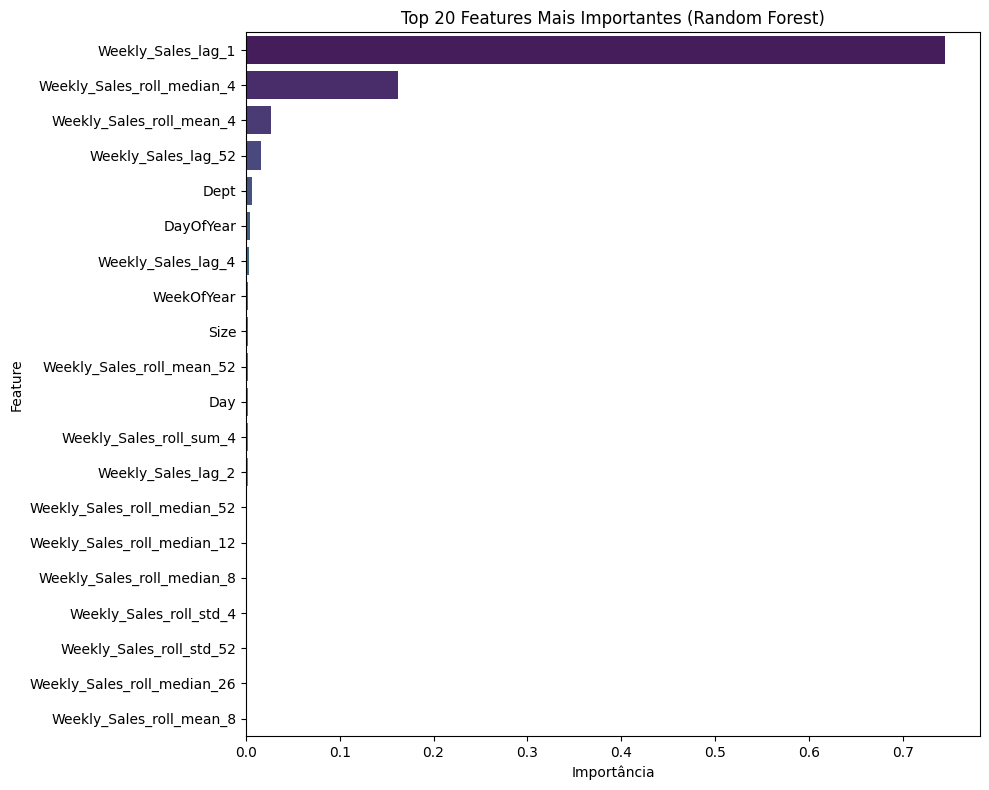

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Análise de Importância das Features (Random Forest) ---")

# 1. Extrair a importância das features
importances = rf_model.feature_importances_
feature_names = X_treino.columns # Lista dos nomes das suas features

# 2. Criar um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Ordenar as features pela importância (da mais importante para a menos importante)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Visualizar as features mais importantes
print("\nImportância das Features (Top 15):")
display(feature_importance_df.head(15))

# Plotar a importância das features (ex: Top 15 ou 20)
plt.figure(figsize=(10, 8))
top_n_features = 20 # Número de features mais importantes a serem plotadas
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')
plt.title(f'Top {top_n_features} Features Mais Importantes (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Treinamento do Modelo Final (Random Forest) e Previsões no Conjunto de Teste

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np

print("--- Treinamento do Modelo Final (Random Forest) e Previsões no Teste ---")

# 1. Preparar os dados para o treinamento final
# Usaremos todo o df_train_merged para treinar o modelo final.
# As 'colunas_features' devem ser as mesmas que você usou para X_treino e X_validacao.
# Se você não tem a lista 'colunas_features' disponível nesta célula, recrie-a:
if 'colunas_features' not in locals() and 'X_treino' in locals(): # 'locals()' verifica se a variável existe no escopo local
    colunas_features = X_treino.columns.tolist()
elif 'colunas_features' not in locals():
    # Recriar se X_treino também não estiver definido (ajuste se necessário)
    colunas_features = [col for col in df_train_merged.columns if col not in ['Weekly_Sales', 'Date']]
    print("Recriando 'colunas_features'.")


X_full_train = df_train_merged[colunas_features]
y_full_train = df_train_merged['Weekly_Sales']

# Garantir que X_teste tem as mesmas colunas que X_full_train
# (Isso já foi verificado anteriormente, mas é uma boa prática)
if list(X_full_train.columns) != list(X_teste.columns):
    print("ALERTA: Colunas de X_full_train e X_teste não são idênticas! Verifique.")
    # Aqui você poderia adicionar lógica para alinhar colunas, se necessário,
    # mas idealmente elas já estão alinhadas pelos passos anteriores.
    # X_teste = X_teste[X_full_train.columns] # Exemplo de alinhamento forçado

print(f"Shape de X_full_train: {X_full_train.shape}")
print(f"Shape de y_full_train: {y_full_train.shape}")
print(f"Shape de X_teste: {X_teste.shape}")

# 2. Instanciar e Treinar o modelo Random Forest final
# Use os parâmetros que você definiu e que deram bons resultados na validação
print("\nTreinando o modelo Random Forest final com todos os dados de treino...")
final_rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=5
)
final_rf_model.fit(X_full_train, y_full_train)
print("Treinamento do modelo final concluído.")

# 3. Fazer previsões no conjunto de teste
print("\nFazendo previsões no conjunto de teste...")
predicoes_finais_teste = final_rf_model.predict(X_teste)
print("Previsões no conjunto de teste concluídas.")
print(f"Número de previsões geradas: {len(predicoes_finais_teste)}")
print("Exemplo das primeiras 5 previsões:", predicoes_finais_teste[:5])

--- Treinamento do Modelo Final (Random Forest) e Previsões no Teste ---
Shape de X_full_train: (421570, 49)
Shape de y_full_train: (421570,)
Shape de X_teste: (115064, 49)

Treinando o modelo Random Forest final com todos os dados de treino...
Treinamento do modelo final concluído.

Fazendo previsões no conjunto de teste...
Previsões no conjunto de teste concluídas.
Número de previsões geradas: 115064
Exemplo das primeiras 5 previsões: [36495.11553769  3045.39294894  2595.1086608   3772.46356903
  3638.98976639]


# Retreino do modelo

## Ajustando, Re-treinando e Reavaliando Overfitting do Modelo Random Forest

--- Ajustando, Re-treinando e Reavaliando Overfitting do Modelo Random Forest ---

Passo 1: Verificando e preparando os dados...
Valores ausentes em X_full_train: 0
Valores ausentes em y_full_train: 0
Valores ausentes em X_teste: 0
Número de outliers em Weekly_Sales: 35521


<ipython-input-25-8cbd7573781a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full_train[numeric_cols] = scaler.fit_transform(X_full_train[numeric_cols])
<ipython-input-25-8cbd7573781a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_teste[numeric_cols] = scaler.transform(X_teste[numeric_cols])


Features numéricas padronizadas.

Passo 2: Treinando o modelo Random Forest final com hiperparâmetros ajustados...
Treinamento do modelo final concluído.

Passo 3: Executando validação cruzada (5-fold)...
R² na validação cruzada: 0.9522 (± 0.0107)

Passo 4: Avaliando Overfitting: Performance no Treino vs. Validação ---
Random Forest Final - Treino - MAE: 1436.55, RMSE: 4276.63, R²: 0.9645
Random Forest Final - Validação - MAE: 188010.90, RMSE: 189501.50, R²: -74.3397

Comparativo Treino vs. Validação:


,R2_Treino,R2_Validação,RMSE_Treino,RMSE_Validação,MAE_Treino,MAE_Validação
Random Forest Final,0.964541,-74.339719,4276.625253,189501.500977,1436.550801,188010.89615



Passo 5: Fazendo previsões no conjunto de teste...
Previsões no conjunto de teste concluídas.
Número de previsões geradas: 115064
Exemplo das primeiras 5 previsões: [33541.6713843  18387.26189346 16027.18892694 19019.09290978
  7488.23459084]

Passo 6: Gerando gráfico de importância das features...


<ipython-input-25-8cbd7573781a>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')


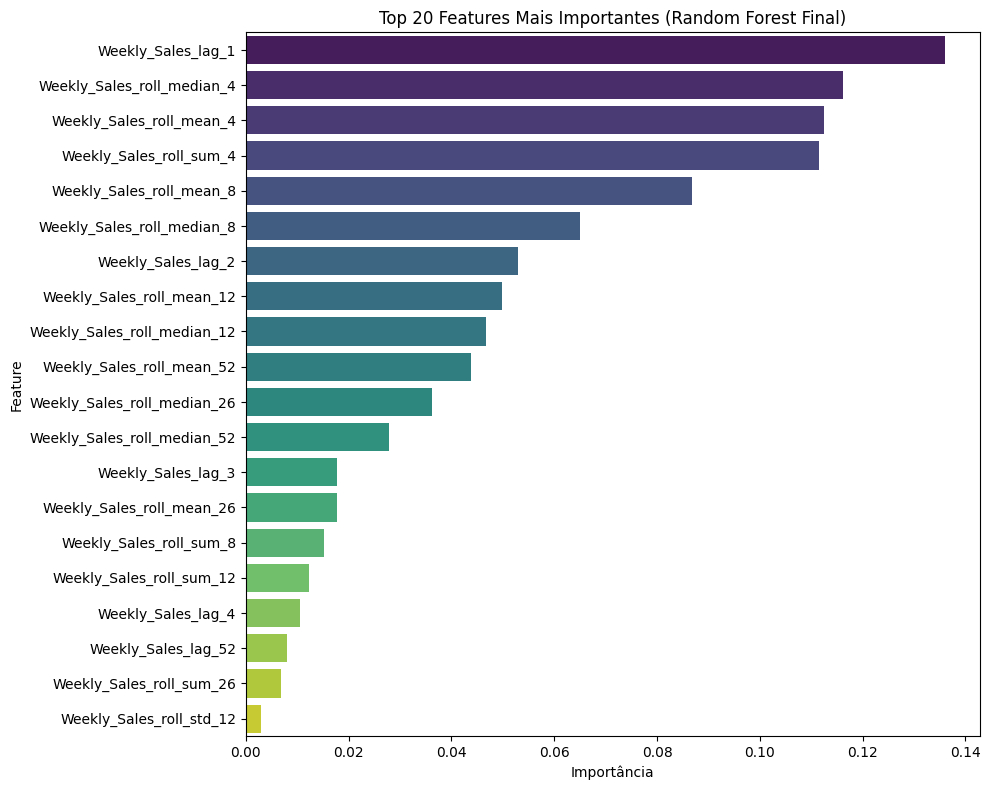

Gráfico de importância das features gerado.


In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("--- Ajustando, Re-treinando e Reavaliando Overfitting do Modelo Random Forest ---")

# Passo 1: Pré-processamento
print("\nPasso 1: Verificando e preparando os dados...")
print("Valores ausentes em X_full_train:", X_full_train.isna().sum().sum())
print("Valores ausentes em y_full_train:", y_full_train.isna().sum())
print("Valores ausentes em X_teste:", X_teste.isna().sum().sum())

# Verificar outliers em Weekly_Sales
Q1 = y_full_train.quantile(0.25)
Q3 = y_full_train.quantile(0.75)
IQR = Q3 - Q1
outliers = y_full_train[(y_full_train < (Q1 - 1.5 * IQR)) | (y_full_train > (Q3 + 1.5 * IQR))]
print(f"Número de outliers em Weekly_Sales: {len(outliers)}")

# Padronizar features numéricas
scaler = StandardScaler()
numeric_cols = X_full_train.select_dtypes(include=['float64', 'int64']).columns
X_full_train[numeric_cols] = scaler.fit_transform(X_full_train[numeric_cols])
X_teste[numeric_cols] = scaler.transform(X_teste[numeric_cols])
print("Features numéricas padronizadas.")

# Passo 2: Treinamento do Modelo Final com Hiperparâmetros Ajustados
print("\nPasso 2: Treinando o modelo Random Forest final com hiperparâmetros ajustados...")
final_rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
final_rf_model.fit(X_full_train, y_full_train)
print("Treinamento do modelo final concluído.")

# Passo 3: Validação Cruzada
print("\nPasso 3: Executando validação cruzada (5-fold)...")
cv_scores = cross_val_score(final_rf_model, X_full_train, y_full_train, cv=5, scoring='r2', n_jobs=-1)
print(f"R² na validação cruzada: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

# Passo 4: Avaliação de Overfitting
print("\nPasso 4: Avaliando Overfitting: Performance no Treino vs. Validação ---")

def calcular_metricas(nome_modelo, modelo, X, y_real, sufixo_dataset=""):
    y_pred = modelo.predict(X)
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)
    print(f"{nome_modelo} - {sufixo_dataset} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

resultados_treino = {}
resultados_validacao = {}
resultados_treino['Random Forest Final'] = calcular_metricas('Random Forest Final', final_rf_model, X_full_train, y_full_train, "Treino")
resultados_validacao['Random Forest Final'] = calcular_metricas('Random Forest Final', final_rf_model, X_validacao, y_validacao, "Validação")

# Comparativo Treino vs. Validação
df_comp_treino = pd.DataFrame(resultados_treino).T.add_suffix('_Treino')
df_comp_validacao = pd.DataFrame(resultados_validacao).T.add_suffix('_Validação')
df_comparativo_overfitting = pd.concat([df_comp_treino, df_comp_validacao], axis=1)
cols_r2 = [col for col in df_comparativo_overfitting.columns if 'R2' in col]
cols_rmse = [col for col in df_comparativo_overfitting.columns if 'RMSE' in col]
cols_mae = [col for col in df_comparativo_overfitting.columns if 'MAE' in col]
df_comparativo_overfitting = df_comparativo_overfitting[cols_r2 + cols_rmse + cols_mae]
print("\nComparativo Treino vs. Validação:")
display(df_comparativo_overfitting)

# Passo 5: Previsões no Conjunto de Teste
print("\nPasso 5: Fazendo previsões no conjunto de teste...")
predicoes_finais_teste = final_rf_model.predict(X_teste)
print("Previsões no conjunto de teste concluídas.")
print(f"Número de previsões geradas: {len(predicoes_finais_teste)}")
print("Exemplo das primeiras 5 previsões:", predicoes_finais_teste[:5])

# Passo 6: Gráfico de Importância das Features
print("\nPasso 6: Gerando gráfico de importância das features...")
importances = final_rf_model.feature_importances_
feature_names = X_full_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
top_n_features = 20
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')
plt.title(f'Top {top_n_features} Features Mais Importantes (Random Forest Final)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Gráfico de importância das features gerado.")

## Retreinar o Modelo

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display

def preparar_dados(df, colunas_features, coluna_alvo):
    """
    Realiza o pré-processamento completo dos dados.
    - Limpeza de NaNs
    - Remoção de outliers
    - Divisão estratificada em treino/validação
    - Padronização de features numéricas
    - Transformação logarítmica do alvo
    """
    print("\n--- Passo 1: Preparando e Limpando os Dados ---")

    # Limpeza de valores ausentes
    df_clean = df.dropna().copy()
    print(f"Dados após remoção de NaNs: {df_clean.shape}")

    # Definir features e alvo
    X_full = df_clean[colunas_features]
    y_full = df_clean[coluna_alvo]

    # Converter colunas de data para timestamp
    datetime_cols = X_full.select_dtypes(include=['datetime64[ns]']).columns
    for col in datetime_cols:
        X_full.loc[:, col] = pd.to_datetime(X_full[col]).astype('int64') // 10**9

    # Remover outliers de Weekly_Sales (opcional, mas recomendado)
    Q1 = y_full.quantile(0.25)
    Q3 = y_full.quantile(0.75)
    IQR = Q3 - Q1
    mask_outlier = (y_full >= (Q1 - 1.5 * IQR)) & (y_full <= (Q3 + 1.5 * IQR))
    X_full = X_full[mask_outlier].copy()
    y_full = y_full[mask_outlier].copy()
    print(f"Número de outliers removidos: {len(df_clean) - len(y_full)}")

    # Estratificação por 'Store_Dept' para garantir representatividade
    X_full['Store_Dept'] = X_full['Store'].astype(str) + '_' + X_full['Dept'].astype(str)
    store_dept_counts = X_full['Store_Dept'].value_counts()
    valid_combinations = store_dept_counts[store_dept_counts >= 2].index
    mask_stratify = X_full['Store_Dept'].isin(valid_combinations)
    X_full = X_full[mask_stratify].copy()
    y_full = y_full[mask_stratify].copy()

    # Divisão em treino e validação
    X_train, X_validacao, y_train, y_validacao = train_test_split(
        X_full.drop(columns=['Store_Dept']), y_full, test_size=0.2, random_state=42,
        stratify=X_full['Store_Dept']
    )
    print(f"Shape de X_train: {X_train.shape}, Shape de X_validacao: {X_validacao.shape}")

    # Padronização das features numéricas
    scaler = StandardScaler()
    numeric_cols = X_train.select_dtypes(include=np.number).columns
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_validacao[numeric_cols] = scaler.transform(X_validacao[numeric_cols])
    print("Features numéricas padronizadas.")

    # Transformação logarítmica no alvo para estabilizar a variância
    y_train_log = np.log1p(y_train)
    y_validacao_log = np.log1p(y_validacao)

    return X_train, X_validacao, y_train, y_validacao, y_train_log, y_validacao_log, scaler, numeric_cols

def otimizar_e_treinar_modelo(X_train, y_train_log):
    """
    Otimiza hiperparâmetros com GridSearchCV e treina o modelo final.
    """
    print("\n--- Passo 2: Otimizando Hiperparâmetros e Treinando ---")

    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [15, 20, None],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [10, 20],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train_log)

    print(f"\nMelhores hiperparâmetros encontrados: {grid_search.best_params_}")

    final_model = grid_search.best_estimator_
    print("Modelo final treinado com sucesso.")

    return final_model

def avaliar_desempenho(model, X_train, y_train, y_train_log, X_validacao, y_validacao, y_validacao_log):
    """
    Calcula métricas, executa validação cruzada e compara treino vs. validação.
    """
    print("\n--- Passo 3: Avaliando o Desempenho do Modelo ---")

    # Validação Cruzada
    cv_scores = cross_val_score(model, X_train, y_train_log, cv=5, scoring='r2', n_jobs=-1)
    print(f"\nValidação Cruzada (R²): {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

    # Função auxiliar para calcular métricas
    def calcular_metricas(y_real, y_pred):
        mae = mean_absolute_error(y_real, y_pred)
        rmse = np.sqrt(mean_squared_error(y_real, y_pred))
        r2 = r2_score(y_real, y_pred)
        return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    # Avaliação no treino
    y_pred_train = np.expm1(model.predict(X_train))
    metrics_train = calcular_metricas(y_train, y_pred_train)
    df_train = pd.DataFrame(metrics_train, index=['Treino'])

    # Avaliação na validação
    y_pred_valid = np.expm1(model.predict(X_validacao))
    metrics_valid = calcular_metricas(y_validacao, y_pred_valid)
    df_valid = pd.DataFrame(metrics_valid, index=['Validação'])

    # Comparativo
    df_comparativo = pd.concat([df_train, df_valid])
    print("\nComparativo de Métricas (Treino vs. Validação):")
    display(df_comparativo)

def gerar_previsoes(model, df_teste, scaler, numeric_cols, colunas_features):
    """
    Prepara os dados de teste e gera as previsões finais.
    """
    print("\n--- Passo 4: Gerando Previsões no Conjunto de Teste ---")
    X_teste = df_teste[colunas_features].copy()

    # Converter colunas de data para timestamp
    datetime_cols = X_teste.select_dtypes(include=['datetime64[ns]']).columns
    for col in datetime_cols:
        X_teste.loc[:, col] = pd.to_datetime(X_teste[col]).astype('int64') // 10**9

    # Aplica a mesma padronização usada no treino
    X_teste[numeric_cols] = scaler.transform(X_teste[numeric_cols])

    # Gera previsões e reverte a transformação logarítmica
    predicoes_log = model.predict(X_teste)
    predicoes_finais = np.expm1(predicoes_log)

    print(f"Número de previsões geradas: {len(predicoes_finais)}")
    print("Exemplo das primeiras 5 previsões:", predicoes_finais[:5])
    return predicoes_finais

# --- Bloco Principal de Execução ---
# Definição das colunas
coluna_alvo = 'Weekly_Sales'
colunas_features = [col for col in df_train_merged.columns if col != coluna_alvo]

# 1. Preparar Dados
X_train, X_validacao, y_train, y_validacao, y_train_log, y_validacao_log, scaler, numeric_cols = preparar_dados(
    df_train_merged, colunas_features, coluna_alvo
)

# 2. Otimizar e Treinar
modelo_final = otimizar_e_treinar_modelo(X_train, y_train_log)

# 3. Avaliar Desempenho
avaliar_desempenho(modelo_final, X_train, y_train, y_train_log, X_validacao, y_validacao, y_validacao_log)

# 4. Gerar Previsões
previsoes = gerar_previsoes(modelo_final, df_teste_raw, scaler, numeric_cols, colunas_features)


--- Passo 1: Preparando e Limpando os Dados ---
Dados após remoção de NaNs: (421570, 51)


<ipython-input-26-c4adde8202be>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1265328000 1265932800 1266537600 ... 1350000000 1350604800 1351209600]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  X_full.loc[:, col] = pd.to_datetime(X_full[col]).astype('int64') // 10**9


Número de outliers removidos: 35521
Shape de X_train: (308807, 50), Shape de X_validacao: (77202, 50)
Features numéricas padronizadas.

--- Passo 2: Otimizando Hiperparâmetros e Treinando ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
# # Passo 0: Configuração e Imports
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from IPython.display import display

# def preparar_dados(df, colunas_features, coluna_alvo):
#     """
#     Realiza o pré-processamento completo dos dados.
#     - Limpeza de NaNs
#     - Remoção de outliers
#     - Divisão estratificada em treino/validação
#     - Padronização de features numéricas
#     - Transformação logarítmica do alvo
#     """
#     print("\n--- Passo 1: Preparando e Limpando os Dados ---")

#     # Limpeza de valores ausentes
#     df_clean = df.dropna().copy()
#     print(f"Dados após remoção de NaNs: {df_clean.shape}")

#     # Definir features e alvo
#     X_full = df_clean[colunas_features]
#     y_full = df_clean[coluna_alvo]

#     # Remover outliers de Weekly_Sales (opcional, mas recomendado)
#     Q1 = y_full.quantile(0.25)
#     Q3 = y_full.quantile(0.75)
#     IQR = Q3 - Q1
#     mask_outlier = (y_full >= (Q1 - 1.5 * IQR)) & (y_full <= (Q3 + 1.5 * IQR))
#     X_full = X_full[mask_outlier].copy()
#     y_full = y_full[mask_outlier].copy()
#     print(f"Número de outliers removidos: {len(df_clean) - len(y_full)}")

#     # Estratificação por 'Store_Dept' para garantir representatividade
#     X_full['Store_Dept'] = X_full['Store'].astype(str) + '_' + X_full['Dept'].astype(str)
#     store_dept_counts = X_full['Store_Dept'].value_counts()
#     valid_combinations = store_dept_counts[store_dept_counts >= 2].index
#     mask_stratify = X_full['Store_Dept'].isin(valid_combinations)
#     X_full = X_full[mask_stratify].copy()
#     y_full = y_full[mask_stratify].copy()

#     # Divisão em treino e validação
#     X_train, X_validacao, y_train, y_validacao = train_test_split(
#         X_full.drop(columns=['Store_Dept']), y_full, test_size=0.2, random_state=42,
#         stratify=X_full['Store_Dept']
#     )
#     print(f"Shape de X_train: {X_train.shape}, Shape de X_validacao: {X_validacao.shape}")

#     # Padronização das features numéricas
#     scaler = StandardScaler()
#     numeric_cols = X_train.select_dtypes(include=np.number).columns
#     X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
#     X_validacao[numeric_cols] = scaler.transform(X_validacao[numeric_cols])
#     print("Features numéricas padronizadas.")

#     # Transformação logarítmica no alvo para estabilizar a variância
#     y_train_log = np.log1p(y_train)
#     y_validacao_log = np.log1p(y_validacao)

#     return X_train, X_validacao, y_train, y_validacao, y_train_log, y_validacao_log, scaler, numeric_cols

# def otimizar_e_treinar_modelo(X_train, y_train_log):
#     """
#     Otimiza hiperparâmetros com GridSearchCV e treina o modelo final.
#     """
#     print("\n--- Passo 2: Otimizando Hiperparâmetros e Treinando ---")

#     param_grid = {
#         'n_estimators': [100, 150],
#         'max_depth': [15, 20, None],
#         'min_samples_split': [10, 20],
#         'min_samples_leaf': [10, 20],
#         'max_features': ['sqrt', 'log2']
#     }

#     rf = RandomForestRegressor(random_state=42, n_jobs=-1)
#     grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
#     grid_search.fit(X_train, y_train_log)

#     print(f"\nMelhores hiperparâmetros encontrados: {grid_search.best_params_}")

#     # O best_estimator_ já é o modelo treinado com os melhores parâmetros em todo o X_train
#     final_model = grid_search.best_estimator_
#     print("Modelo final treinado com sucesso.")

#     return final_model

# def avaliar_desempenho(model, X_train, y_train, y_train_log, X_validacao, y_validacao, y_validacao_log):
#     """
#     Calcula métricas, executa validação cruzada e compara treino vs. validação.
#     """
#     print("\n--- Passo 3: Avaliando o Desempenho do Modelo ---")

#     # Validação Cruzada (Cross-Validation)
#     cv_scores = cross_val_score(model, X_train, y_train_log, cv=5, scoring='r2', n_jobs=-1)
#     print(f"\nValidação Cruzada (R²): {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

#     # Função auxiliar para calcular métricas
#     def calcular_metricas(y_real, y_pred):
#         mae = mean_absolute_error(y_real, y_pred)
#         rmse = np.sqrt(mean_squared_error(y_real, y_pred))
#         r2 = r2_score(y_real, y_pred)
#         return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

#     # Avaliação no treino
#     y_pred_train = np.expm1(model.predict(X_train))
#     metrics_train = calcular_metricas(y_train, y_pred_train)
#     df_train = pd.DataFrame(metrics_train, index=['Treino'])

#     # Avaliação na validação
#     y_pred_valid = np.expm1(model.predict(X_validacao))
#     metrics_valid = calcular_metricas(y_validacao, y_pred_valid)
#     df_valid = pd.DataFrame(metrics_valid, index=['Validação'])

#     # Comparativo
#     df_comparativo = pd.concat([df_train, df_valid])
#     print("\nComparativo de Métricas (Treino vs. Validação):")
#     display(df_comparativo)

# def gerar_previsoes(model, df_teste, scaler, numeric_cols):
#     """
#     Prepara os dados de teste e gera as previsões finais.
#     """
#     print("\n--- Passo 4: Gerando Previsões no Conjunto de Teste ---")
#     X_teste = df_teste.copy()

#     # Aplica a mesma padronização usada no treino
#     X_teste[numeric_cols] = scaler.transform(X_teste[numeric_cols])

#     # Gera previsões e reverte a transformação logarítmica
#     predicoes_log = model.predict(X_teste)
#     predicoes_finais = np.expm1(predicoes_log)

#     print(f"Número de previsões geradas: {len(predicoes_finais)}")
#     print("Exemplo das primeiras 5 previsões:", predicoes_finais[:5])
#     return predicoes_finais

# def visualizar_analise_modelo(model, X_validacao, y_validacao, feature_names):
#     """
#     Gera gráficos essenciais para a análise do modelo.
#     """
#     print("\n--- Passo 5: Gerando Gráficos de Análise ---")

#     y_pred_validacao = np.expm1(model.predict(X_validacao))

#     # Gráfico 1: Reais vs. Previstos
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=y_validacao, y=y_pred_validacao, alpha=0.5, s=20)
#     plt.plot([y_validacao.min(), y_validacao.max()], [y_validacao.min(), y_validacao.max()], 'k--', lw=2, label='Previsão Perfeita')
#     plt.title('Valores Reais vs. Previstos (Validação)', fontsize=14)
#     plt.xlabel('Valores Reais (Weekly_Sales)', fontsize=12)
#     plt.ylabel('Valores Previstos (Weekly_Sales)', fontsize=12)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # Gráfico 2: Resíduos
#     residuos = y_validacao - y_pred_validacao
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=y_pred_validacao, y=residuos, alpha=0.5, s=20)
#     plt.hlines(y=0, xmin=y_pred_validacao.min(), xmax=y_pred_validacao.max(), colors='red', lw=2, linestyles='--', label='Resíduo = 0')
#     plt.title('Gráfico de Resíduos (Validação)', fontsize=14)
#     plt.xlabel('Valores Previstos', fontsize=12)
#     plt.ylabel('Resíduos (Real - Previsto)', fontsize=12)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # Gráfico 3: Importância das Features
#     feature_importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': model.feature_importances_
#     }).sort_values(by='Importance', ascending=False)

#     plt.figure(figsize=(12, 8))
#     sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis', hue='Feature', dodge=False, legend=False)
#     plt.title('Top 20 Features Mais Importantes', fontsize=14)
#     plt.xlabel('Importância', fontsize=12)
#     plt.ylabel('Feature', fontsize=12)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# # --- Bloco Principal de Execução ---
# if __name__ == "__main__":
#     # Carregue seus dados aqui
#     # Exemplo:
#     # df_train_merged = pd.read_csv('seu_arquivo_de_treino.csv')
#     # df_teste_raw = pd.read_csv('seu_arquivo_de_teste.csv')

#     # Para demonstração, vamos criar dados fictícios que se assemelham ao seu problema
#     from sklearn.datasets import make_regression
#     X_demo, y_demo = make_regression(n_samples=5000, n_features=10, noise=20, random_state=42)
#     col_names = [f'Feature_{i}' for i in range(10)]
#     df_train_merged = pd.DataFrame(X_demo, columns=col_names)
#     df_train_merged['Weekly_Sales'] = y_demo + abs(y_demo.min()) + 1000 # Garantir valores positivos
#     df_train_merged['Store'] = np.random.randint(1, 6, size=5000)
#     df_train_merged['Dept'] = np.random.randint(1, 11, size=5000)

#     X_teste_demo, _ = make_regression(n_samples=500, n_features=10, random_state=1)
#     df_teste_raw = pd.DataFrame(X_teste_demo, columns=col_names)
#     df_teste_raw['Store'] = np.random.randint(1, 6, size=500)
#     df_teste_raw['Dept'] = np.random.randint(1, 11, size=500)

In [ ]:
    # # Definição das colunas
    # coluna_alvo = 'Weekly_Sales'
    # colunas_features = [col for col in df_train_merged.columns if col != coluna_alvo]

    # # 1. Preparar Dados
    # X_train, X_validacao, y_train, y_validacao, y_train_log, y_validacao_log, scaler, numeric_cols = preparar_dados(
    #     df_train_merged, colunas_features, coluna_alvo
    # )

    # # 2. Otimizar e Treinar
    # modelo_final = otimizar_e_treinar_modelo(X_train, y_train_log)

    # # 3. Avaliar Desempenho
    # avaliar_desempenho(modelo_final, X_train, y_train, y_train_log, X_validacao, y_validacao, y_validacao_log)

    # # 4. Gerar Previsões (usando um df_teste com as mesmas colunas de features)
    # features_teste = [col for col in colunas_features if col in df_teste_raw.columns]
    # previsoes = gerar_previsoes(modelo_final, df_teste_raw[features_teste], scaler, numeric_cols)

    # # 5. Visualizar Análise do Modelo
    # visualizar_analise_modelo(modelo_final, X_validacao, y_validacao, X_train.columns)

In [ ]:
print(X_validacao[['Store', 'Dept']].value_counts())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar os dados da loja 3 e departamento 90
mask = (X_validacao['Store'] == 3) & (X_validacao['Dept'] == 90)
X_validacao_loja3_dept90 = X_validacao[mask].copy()
y_validacao_loja3_dept90 = y_validacao[mask].copy()

# Verificar se há dados para plotar
if len(X_validacao_loja3_dept90) == 0:
    print("Nenhum dado encontrado para a Loja 3, Departamento 90 no conjunto de validação.")
else:
    print(f"Número de amostras para Loja 3, Dept 90: {len(X_validacao_loja3_dept90)}")

    # Gerar previsões para os dados filtrados
    y_pred_log_loja3_dept90 = modelo_final.predict(X_validacao_loja3_dept90)
    y_pred_loja3_dept90 = np.expm1(y_pred_log_loja3_dept90)  # Reverter a transformação logarítmica

    # Gráfico: Vendas Reais vs. Vendas Previstas
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_validacao_loja3_dept90, y=y_pred_loja3_dept90, alpha=0.6, s=50, color='blue', label='Dados')
    plt.plot(
        [y_validacao_loja3_dept90.min(), y_validacao_loja3_dept90.max()],
        [y_validacao_loja3_dept90.min(), y_validacao_loja3_dept90.max()],
        'k--', lw=2, label='Previsão Perfeita (y=x)'
    )
    plt.xlabel("Vendas Reais (Weekly_Sales)", fontsize=12)
    plt.ylabel("Vendas Previstas (Weekly_Sales)", fontsize=12)
    plt.title("Vendas Reais vs. Previstas - Loja 3, Dept 90 (Validação)", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficos